In [1]:
import PyComplexHeatmap as pch
import pandas as pd
from pathlib import Path
import re
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import muon as mu

2024-02-27 18:18:52.265761: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 18:18:53.690461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
coorDf=pd.read_csv("../process_data/trajMap/pearsonAll_injury.csv",index_col=0)
peakDf=pd.read_csv("../process_data/trajMap/maxAllDf_injury.csv",index_col=0)
exprDf=pd.read_csv("../process_data/trajMap/sumAllDf_injury.csv",index_col=0)

In [8]:
TRAVMap=mu.read_h5mu("../process_data/trajMap/1.12_trajmap_2nd.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [23]:
goRes=pd.read_csv("../process_data/traj_diff/trajdiff_go.csv",index_col=0)

In [31]:
split_list = goRes.loc[5]["geneID"].split("/")

In [122]:
goID=[5,1245,2553,3092,3871,4690,4755]

In [203]:
goRes.loc[goID]

,Cluster,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
5,Up_Up,BP,GO:0042060,wound healing,26/259,370/28891,6.515074e-16,4.964487e-13,3.095689e-13,Gpx1/Dtnbp1/Kng2/Mia3/Hif1a/Smoc2/B4galt1/Nfe2...,26
1245,Up_0,BP,GO:0032611,interleukin-1 beta production,11/364,101/28891,6.311355e-08,8.638413e-06,5.529133e-06,Cd36/Ccl3/Igf1/Stat3/Casp8/Egr1/Il1b/Foxp1/Ser...,11
2553,Down_Down,BP,GO:0071772,response to BMP,10/375,181/28891,1.365491e-04,2.464969e-03,1.802801e-03,Hes1/Msx2/Prmt1/Id1/Gpc3/Foxd1/Sox11/Sfrp2/Col...,10
3092,Down_0,BP,GO:0045165,cell fate commitment,25/478,307/28891,7.607581e-11,2.253474e-08,1.678244e-08,Kdr/Kdm6b/Rbbp7/Fgfr2/Ror2/Sox9/Casp3/Cdon/Edn...,25
3871,0_Down,BP,GO:0006631,fatty acid metabolic process,5/38,463/28891,3.357212e-04,3.384977e-02,2.540191e-02,Cyb5a/Acadvl/Hacd2/Irs2/Hacd1,5
4690,Up_Down,MF,GO:0008083,growth factor activity,11/163,149/28407,1.102494e-09,2.012051e-07,1.520281e-07,Ogn/Hbegf/Clec11a/Csf1/Tgfb2/Tgfb3/Thbs4/Il6/F...,11
4755,Down_Up,BP,GO:1904738,vascular associated smooth muscle cell migration,3/49,39/28891,4.013519e-05,6.040346e-03,4.207858e-03,Agt/Adipoq/Pcsk5,3


In [159]:
geneDict={}
for i in goID:
    name=goRes.loc[i]["Cluster"]
    geneSplit=goRes.loc[i]["geneID"].split("/")
    geneSplit=random.sample(geneSplit,np.min([len(geneSplit),5]))
    geneDict[name]=geneSplit

In [160]:
concatenated_list = sum((list(geneDict.values())), [])

In [161]:
# Create a list of tuples containing key-value pairs
key_value_pairs = [(key, value) for key, values in geneDict.items() for value in values]

# Create DataFrame from the list of tuples
df = pd.DataFrame(key_value_pairs, columns=['Key', 'Value'])

In [25]:
goRes[goRes["ID"]=="GO:0042060"]

,Cluster,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
5,Up_Up,BP,GO:0042060,wound healing,26/259,370/28891,6.515074e-16,4.964487e-13,3.095689e-13,Gpx1/Dtnbp1/Kng2/Mia3/Hif1a/Smoc2/B4galt1/Nfe2...,26
1278,Up_0,BP,GO:0042060,wound healing,18/364,370/28891,1.310496e-06,8.688180e-05,5.560987e-05,Cd36/Igf1/Ext1/Nfatc1/Hmox1/Tpm1/Cdkn1a/Lrg1/P...,18
3906,Up_Down,BP,GO:0042060,wound healing,18/163,370/28891,4.094592e-12,2.596790e-09,1.774898e-09,Actg1/Tnfrsf12a/F3/Vkorc1/Hbegf/Pdpn/Apoe/Myh9...,18


In [ ]:
col_ha = pch.HeatmapAnnotation(Age=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [ ]:
MesSelect=TRAVMap.obs["MesInjury"]

In [ ]:
new_labels = np.where(np.isin(TRAVMap.obs["Stage"], ['Injury(5-FU)', 'Injury(Non-Regeneration)', 'Injury(Radiation)', 'Injury(Regeneration)']),
                      'Injury', 'Other')

In [61]:
coorDf=pd.DataFrame(TRAVMap["coor"].layers["raw"])
exprDf=pd.DataFrame(TRAVMap["expr"].layers["raw"])
peakDf=pd.DataFrame(TRAVMap["peak"].layers["raw"])

In [62]:
coorDf.columns=TRAVMap["coor"].var_names
coorDf.index=TRAVMap["coor"].obs_names
exprDf.columns=TRAVMap["coor"].var_names
exprDf.index=TRAVMap["coor"].obs_names
peakDf.columns=TRAVMap["coor"].var_names
peakDf.index=TRAVMap["coor"].obs_names


In [63]:
coorDf=coorDf.T
exprDf=exprDf.T
peakDf=peakDf.T

In [64]:
coorDf_sqrt = np.where(coorDf >= 0, np.sqrt(coorDf), -np.sqrt(-coorDf))
coorDf_sqrt=pd.DataFrame(coorDf_sqrt)
coorDf_sqrt.columns=coorDf.columns
coorDf_sqrt.index=coorDf.index
exprDf = exprDf.apply(lambda row: (row) / (row.max()), axis=1)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [65]:
def makeLong(gene,sampleIndex):
    selectCoor=coorDf_sqrt.loc[gene]
    selectExpr=exprDf.loc[gene]
    selectPeak=peakDf.loc[gene]
    selectCoor=selectCoor.iloc[:,sampleIndex]
    selectExpr=selectExpr.iloc[:,sampleIndex]
    selectPeak=selectPeak.iloc[:,sampleIndex]
    coorLong=selectCoor.stack().reset_index(name="Coor")
    exprLong=selectExpr.stack().reset_index(name="Expr")
    peakLong=selectPeak.stack().reset_index(name="Peak")
    peakLong['Stage']=peakLong.Peak.apply(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Stage']
    return(combineDf)

In [35]:
geneSelect = goRes.loc[5]["geneID"].split("/")[0:5]

In [37]:
lineage=trajMap.obs["Lineage"]

In [43]:
np.where(trajMap.obs["Lineage"]=="Mesenchyme")

(array([  1,   5,   6,   7,  15,  16,  17,  22,  23,  29,  30,  37,  40,
         41,  43,  48,  56,  57,  58,  63,  65,  66,  68,  71,  75,  76,
         79,  84,  86,  91,  93,  94,  96,  98,  99, 100, 103, 104, 106,
        114, 116, 121, 129, 130, 143, 144, 149, 153, 156, 162, 164, 167,
        170, 171, 175, 180, 183, 190, 192, 194, 195, 197, 198, 199, 204,
        205, 206, 207, 215, 221, 223, 226, 228, 229, 230, 231, 233, 234,
        235, 238, 241, 243, 244, 245, 252, 253, 254, 255, 257, 258, 262,
        266, 269, 273, 274, 276]),)

In [44]:
combined_list=np.where(trajMap.obs["Lineage"]=="Mesenchyme")[0]

In [78]:
combined_list1=np.where((trajMap.obs["Lineage"]=="Mesenchyme") & (trajMap.obs["MesInjury"]!="None" ))[0]

In [192]:
combined_list2=np.where((trajMap.obs["Lineage"]=="Mesenchyme") & (trajMap.obs["MesInjury"]=="None" ))[0]

In [193]:
import random
combined_list2=random.sample(set(combined_list2),20)

In [194]:
combined_list=combined_list1.tolist()+combined_list2

In [196]:
dotPlotDf=makeLong(concatenated_list,combined_list)

In [197]:
meta=trajMap.obs.iloc[combined_list]

In [198]:
injuryAnno=meta[["MesInjury","Age","Organ"]]

In [199]:
df.index=df.Value

In [200]:
injuryAnno["Age"]=injuryAnno["Age"].astype("str")
injuryAnno["Organ"]=injuryAnno["Organ"].astype("str")

/tmp/ipykernel_2941623/2292705394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuryAnno["Age"]=injuryAnno["Age"].astype("str")
/tmp/ipykernel_2941623/2292705394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuryAnno["Organ"]=injuryAnno["Organ"].astype("str")


In [201]:
col_ha = pch.HeatmapAnnotation(Injury=pch.anno_simple(injuryAnno['MesInjury'],cmap='Set1',legend=False,add_text=True),
                               Age=pch.anno_simple(injuryAnno['Age'],cmap='Set2',legend=True,add_text=False),
                               Tissue=pch.anno_simple(injuryAnno['Organ'],cmap='Set3',legend=True,add_text=False),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})
row_ha = pch.HeatmapAnnotation(Row=pch.anno_simple(df['Key'],cmap='Set3',
                                           add_text=True,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=False),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 46.56805555555555 mm


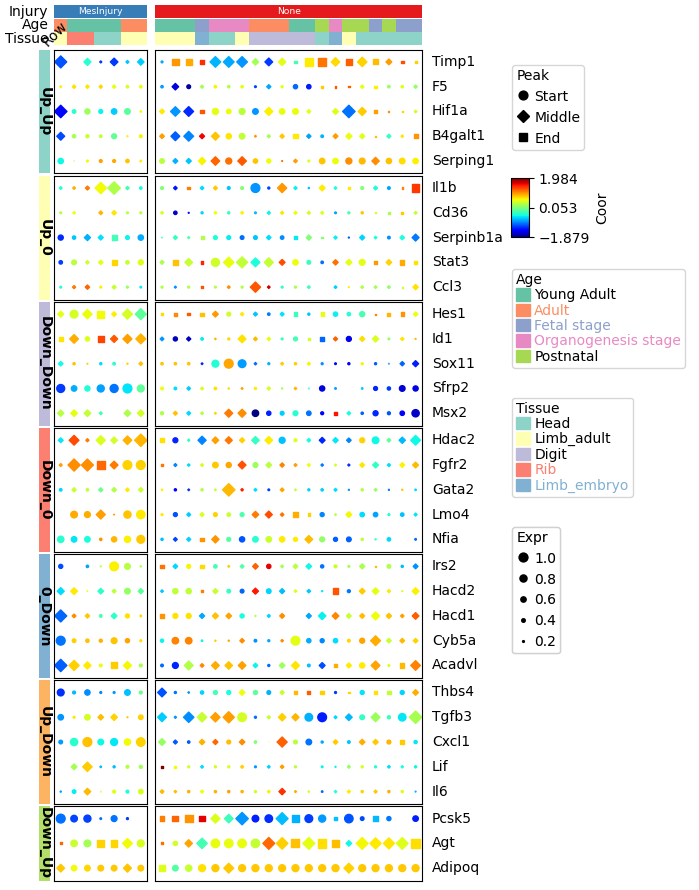

In [202]:
plt.figure(figsize=(5,10))
cm = pch.DotClustermapPlotter(dotPlotDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,row_split=df['Key'],
                              col_split_gap=2, col_split=injuryAnno['MesInjury'],ratio=40,left_annotation=row_ha,row_split_order=geneDict.keys(),
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/1.1_fig6/3.5_diffGene_dotplot_3.pdf")

In [184]:
injuryAnno

,MesInjury,Age,Organ
LimbImplant_VesPrey_Tmem100_sep_Mesenchyme,MesInjury,Adult,Limb_adult
SkeletalMuscle_Julien_d5Poly_sep_Mesenchyme,MesInjury,Adult,Limb_adult
CranioRepairP75_Xu_KO_sep_Mesenchyme,MesInjury,Young Adult,Head
RibRegeneraton_Serowoky_Control_sep_Mesenchyme,MesInjury,Young Adult,Rib
SkeletalMuscle_Julien_d3_sep_Mesenchyme,MesInjury,Adult,Limb_adult
RibRegeneraton_Serowoky_KO_sep_Mesenchyme,MesInjury,Young Adult,Rib
CranioRepairP75_Xu_WT_sep_Mesenchyme,MesInjury,Young Adult,Head
Metaphysis_Yang_4_sep_Mesenchyme,None,Postnatal,Limb_adult
lambdoid_Holmes_P10_sep_Mesenchyme,None,Postnatal,Head
BmscEndosteal_Ono_Gas1CE_sep_Mesenchyme,None,Postnatal,Limb_adult


In [103]:
dotPlotDf

,level_0,level_1,Coor,Expr,Peak
typing.Literal[<no_default>],,,,,
0,Gpx1,LimbImplant_VesPrey_Tmem100_sep_Mesenchyme,-0.942498,0.289530,Middle
1,Gpx1,SkeletalMuscle_Julien_d5Poly_sep_Mesenchyme,0.649033,-0.148737,Start
2,Gpx1,CranioRepairP75_Xu_KO_sep_Mesenchyme,0.324798,-0.129444,Middle
3,Gpx1,RibRegeneraton_Serowoky_Control_sep_Mesenchyme,0.688718,-0.101276,Middle
4,Gpx1,SkeletalMuscle_Julien_d3_sep_Mesenchyme,0.647215,-0.104765,Middle
...,...,...,...,...,...
65,Hif1a,RibRegeneraton_Serowoky_KO_sep_Mesenchyme,0.203929,0.265765,Start
66,Hif1a,SkeletalMuscle_Julien_d3_sep_Mesenchyme,0.570401,0.022917,Start
67,Hif1a,RibRegeneraton_Serowoky_Control_sep_Mesenchyme,-0.319057,0.126872,Start
